In [1]:
import pandas as pd
import numpy as np
import glob
from pylab import *
import ROOT as root
from matplotlib import pyplot as plt

Welcome to JupyROOT 6.16/00


In [7]:
n_blt_2018e_list,n_blt_2018mu_list, n_nano_list = [], [], []
for period in "ABCD":
    tfile = root.TFile('../data/root/Run2018_20200521.root')
    n_blt_2018e = tfile.Get("TotalEvents_electron_2018"+period).GetBinContent(1)
    n_blt_2018mu = tfile.Get("TotalEvents_muon_2018"+period).GetBinContent(1)

#     files = glob.glob("/home/zchen/cms/data/EGamma_Run2018{}/*root".format(period))
#     n_nano = 0
#     for f in files:
#         tfile = root.TFile(f)
#         n_nano += tfile.Get("Events").GetEntriesFast()

#     print("period {}: nano={}, blt_e={}, blt_mu={}".format(period, n_nano, n_blt_2018e, n_blt_2018mu))
#     n_nano_list.append(n_nano)
    n_blt_2018e_list.append(n_blt_2018e)
    n_blt_2018mu_list.append(n_blt_2018mu)
    
    
    
n_blt_2017e_list,n_blt_2017mu_list = [], []
for period in "BCDEF":
    tfile = root.TFile('../data/root/Run2017_20200410.root')
    n_blt_2017e = tfile.Get("TotalEvents_electron_2017"+period).GetBinContent(1)
    n_blt_2017mu = tfile.Get("TotalEvents_muon_2017"+period).GetBinContent(1)

    print("period {}: blt_e={}, blt_mu={}".format(period, n_blt_2017e/1e6, n_blt_2017mu/1e6))
    n_blt_2017e_list.append(n_blt_2017e)
    n_blt_2017mu_list.append(n_blt_2017mu)

period B: blt_e=56.501676, blt_mu=77.830155
period C: blt_e=129.192512, blt_mu=153.695675
period D: blt_e=48.851074, blt_mu=64.737958
period E: blt_e=96.592214, blt_mu=141.057782
period F: blt_e=121.43174, blt_mu=221.973389


In [9]:
n_blt_2018e_list

[243974341.0, 104760425.0, 100446580.0, 472359661.0]

In [20]:
import pandas as pd
df2018 = pd.DataFrame()
df2018["L"] = [13.978,7.064,6.899,31.748]
df2018["e_nano"] =  [327843843,153822427,169173200, 751348648]
df2018["e_nano_ee"] = [5988296,3137281,3332133, 13370060]
df2018["e_bacon"] = [243974341.0, 104760425.0, 100446580.0, 472359661.0] #[56613048.0, 6303050.0, 44535125.0, 451634173.0]
df2018["e_bacon_ee"] = [866525,432190,412720,1874345]# [230835, 26950, 181005,1785905]
df2018["mu_bacon"] =[222724703.0, 110095837.0, 101519247.0, 467717239.0]
df2018["mu_bacon_mumu"] = [2318485,1154393,1114749,5019683]

In [21]:
df2017 = pd.DataFrame()
df2017["L"] = [4.823,9.664,4.252,9.278,13.540]
df2017["e_bacon"] = n_blt_2017e_list
df2017["e_bacon_ee"] = [295020,702735,307175,459580,368720]
df2017["mu_bacon"] = n_blt_2017mu_list
df2017["mu_bacon_mumu"] = [777881,1580301,723927,1329558,1839630]

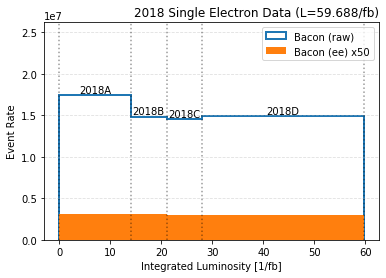

In [24]:

df, periods = df2018, ["2018"+pp for pp in "ABCD"]
# channel, selection = "e_nano", "ee"
# title = "2018 Single Electron Data (L=59.688/fb)"
# figname = "2018_electron_eventRate_nano"

channel, selection = "e_bacon", "ee"
title = "2018 Single Electron Data (L=59.688/fb)"
figname = "2018_electron_eventRate"

# channel, selection = "mu_bacon", "mumu"
# title = "2018 Single Muon Data (L=59.688/fb)"
# figname = "2018_muon_eventRate"

# df, periods = df2017,["2017"+pp for pp in "BCDEF"]
# channel, selection = "mu_bacon", "mumu"
# title = "2017 Muon Data (L=41.557/fb)"
# figname = "2017_muon_eventRate"

# channel, selection = "e_bacon", "ee"
# title = "2017 Electron Data (L=41.557/fb)"
# figname = "2017_electron_eventRate"


bins = np.r_[np.array([0]), np.cumsum(df.L)]
c = (bins[1:]+bins[:-1])/2

h1 = plt.hist(c, weights=df[channel].astype(float)/df.L, bins=bins, histtype="step",linewidth=2,label="Bacon (raw)")
h2 = plt.hist(c, weights=df[channel+"_"+selection].astype(float)/df.L*50, bins=bins,linewidth=1,label="Bacon ({}) x50".format(selection))
h1,h2 = h1[0],h2[0]

ynorm = np.max(h1)
plt.ylim(0,1.5*ynorm)

plt.xlabel("Integrated Luminosity [1/fb]")
plt.ylabel("Event Rate")
plt.legend(loc="upper right")
plt.grid(linestyle="--",alpha=0.4,axis='y')
plt.title(title,loc="right")

for cc,hh,pp in zip(c,h1,periods):
    plt.text(cc,hh,pp, horizontalalignment='center', verticalalignment='bottom')
for bb in bins:
    plt.axvline(bb,linestyle=":",alpha=0.4,color='k')

plt.savefig("../plots/{}.png".format(figname),dpi=200)

# plt.yscale("log")

In [104]:
df2018["e_nano"]

0    327843843
1    153822427
2    169173200
3    751348648
Name: e_nano, dtype: int64

In [33]:
n_bacon_total = [82136296, 9234833, 65420268,736587028]
for n in n_bacon_total:
    print(n/n_bacon_total[0])

1.0
0.11243303447723038
0.7964842729211943
8.967862733912423


In [ ]:
period A: nano=327843843, blt=56613048.0
period B: nano=153822427, blt=6303050.0
period C: nano=169173200, blt=44535125.0
period D: nano=751348648, blt=451634173.0